In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

import plotly.express as px

In [12]:
avail_df=pd.read_csv('listing_df1.csv')

In [13]:
avail_df.head()

,Unnamed: 0,Id,Name,summary,Longitude,Latitude,Space,Description,Neighborhood,Host Id,...,Minumum Nights,Maximum Nights,Availability 30,Availability 60,Availability_90,Availability_365,No of Reviews,Price,City,State
0,0,1003530,New York City - Upper West Side Apt,Not Provided,-73.96523,40.79962,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,454250,...,12,360,0,0,0,93,70,135.0,New York,New York
1,1,10133554,Double and triple rooms Blue mosque,Not Provided,28.98009,41.00620,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,52004703,...,1,1125,30,60,90,365,29,121.0,Fatih,Istanbul
2,2,10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",114.15027,22.28158,Not Provided,"Clean, fully furnish, Spacious 1 bedroom flat ...",Not Provided,51624384,...,4,20,0,0,0,0,3,699.0,Hong Kong,Hong Kong
3,3,10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,114.16690,22.33140,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",51744313,...,1,500,14,24,40,220,81,181.0,Hong Kong,Hong Kong
4,4,10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",151.21554,-33.88029,Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,13764143,...,10,21,0,0,0,0,64,181.0,Surry Hills,New South Wales


In [14]:
avail_df.drop(columns='Unnamed: 0',inplace=True)

In [15]:
df=avail_df[['Name','Price','Host Name','Accomodates','Room Type','Property Type','Longitude','Latitude','Bedrooms','Availability 30','Availability 60','Availability_90','Availability_365','No of Reviews','Rating','City','State','Market','Suburban','Government Area','Country']]

In [16]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
df = df[df.Bedrooms > 0]
df = df[df['Accomodates'] > 0]
df = df[df.Price > 0]

df = df[df['No of Reviews'] > 0]
df=df[df.Bedrooms > 0]


df.head()

,Name,Price,Host Name,Accomodates,Room Type,Property Type,Longitude,Latitude,Bedrooms,Availability 30,...,Availability_90,Availability_365,No of Reviews,Rating,City,State,Market,Suburban,Government Area,Country
0,New York City - Upper West Side Apt,135.0,Greta,2,Private room,Apartment,-73.96523,40.79962,1.0,0,...,0,93,70,94.0,New York,New York,New York,Manhattan,Upper West Side,United States
1,Double and triple rooms Blue mosque,121.0,Mehmet Emin,3,Private room,Bed and breakfast,28.98009,41.00620,1.0,30,...,90,365,29,92.0,Fatih,Istanbul,Istanbul,Fatih,Fatih,Turkey
2,"Soho Cozy, Spacious and Convenient",699.0,Giovanni,3,Entire home/apt,Apartment,114.15027,22.28158,1.0,0,...,0,0,3,100.0,Hong Kong,Hong Kong,Hong Kong,Central & Western District,Central & Western,Hong Kong
3,City center private room with bed,181.0,Yi,1,Private room,Guesthouse,114.16690,22.33140,1.0,14,...,40,220,81,92.0,Hong Kong,Hong Kong,Hong Kong,Sham Shui Po District,Sham Shui Po,Hong Kong
6,Easy 1 Bedroom in Chelsea,145.0,Scott,2,Entire home/apt,Apartment,-74.00074,40.74577,1.0,0,...,0,0,1,100.0,New York,New York,New York,Manhattan,Chelsea,United States


availability Duration

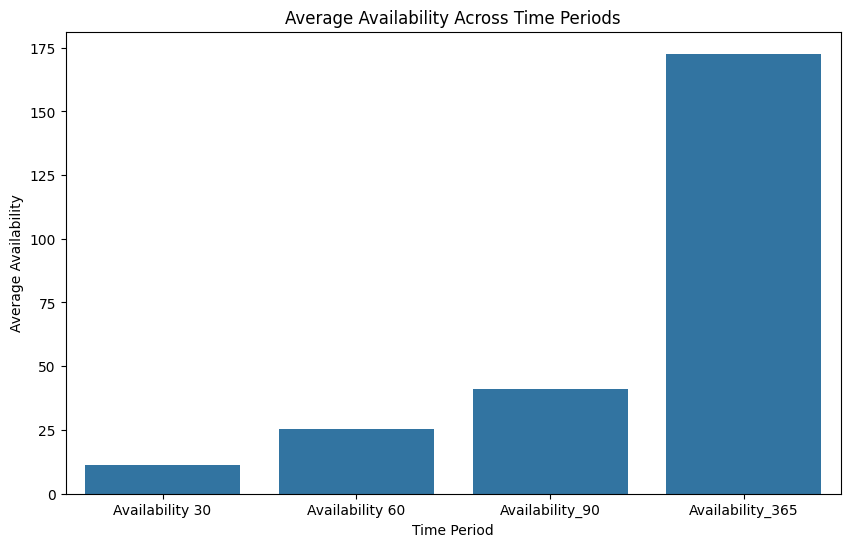

        Time Period  Average Availability
0   Availability 30             11.062153
1   Availability 60             25.150225
2   Availability_90             41.167681
3  Availability_365            172.684739


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create a dataframe with the availability columns
availability_cols = ['Availability 30', 'Availability 60', 'Availability_90', 'Availability_365']
availability_data = df[availability_cols].mean().reset_index()

# Rename columns for easier plotting
availability_data.columns = ['Time Period', 'Average Availability']

# Bar plot for average availability
sns.barplot(x='Time Period', y='Average Availability', data=availability_data)
plt.title('Average Availability Across Time Periods')
plt.show()

print(availability_data)


Availability by Month (Seasonality Analysis)

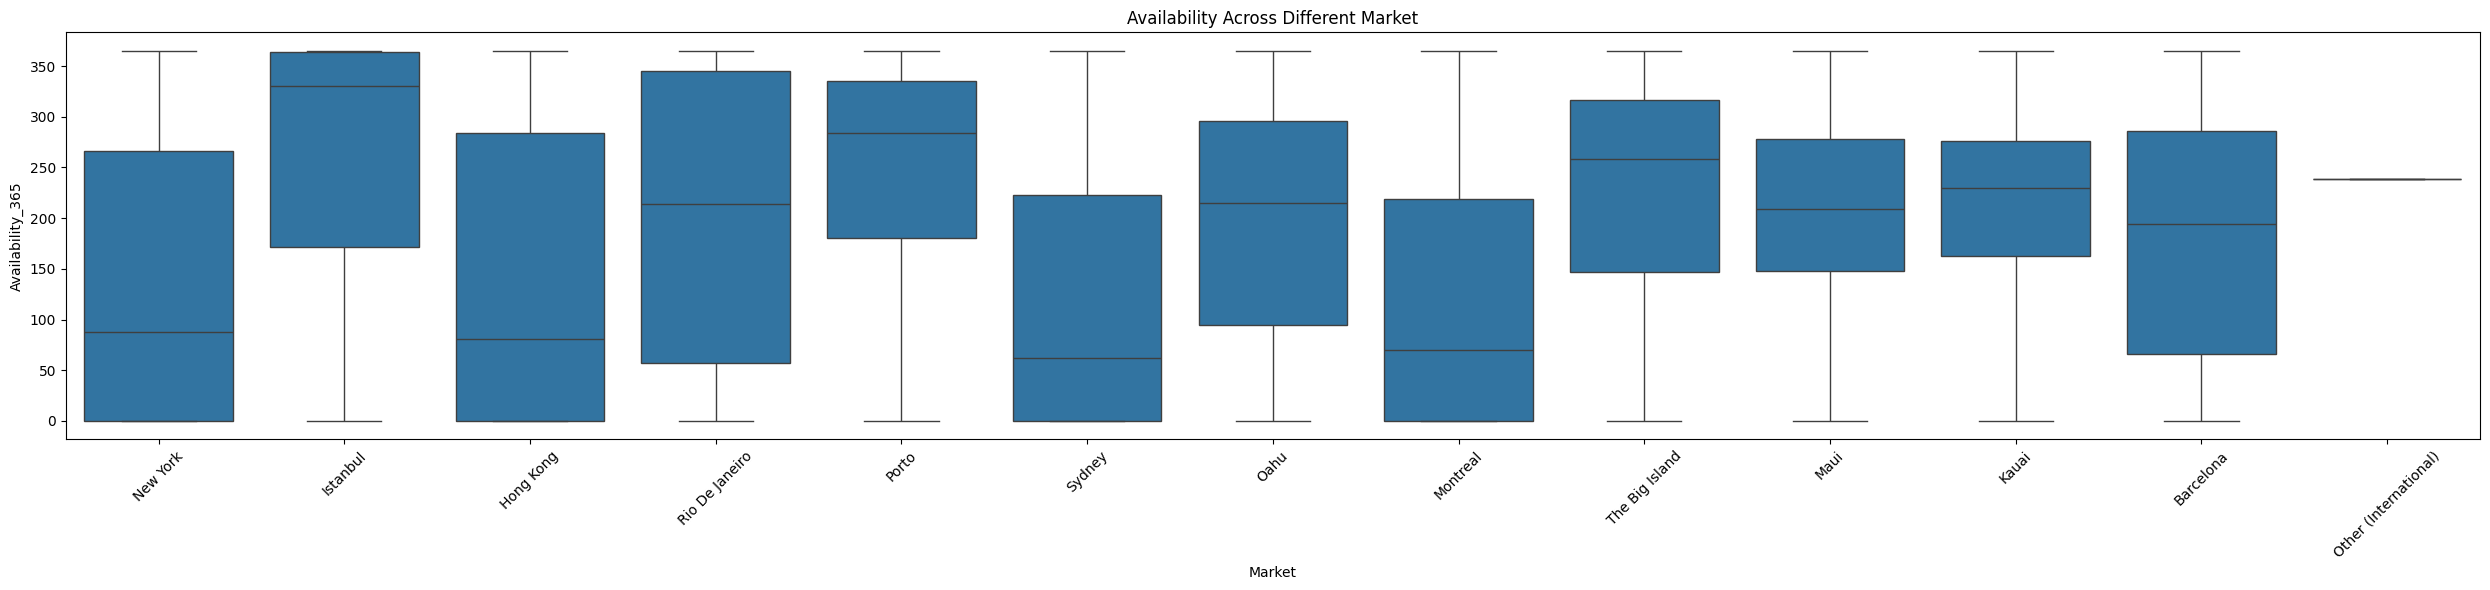

In [18]:
plt.figure(figsize=(25, 6))

# Create a boxplot to show distribution of availability across Market
sns.boxplot(x='Market', y='Availability_365', data=df)
plt.xticks(rotation=45)
plt.title('Availability Across Different Market')
plt.tight_layout()
plt.show()


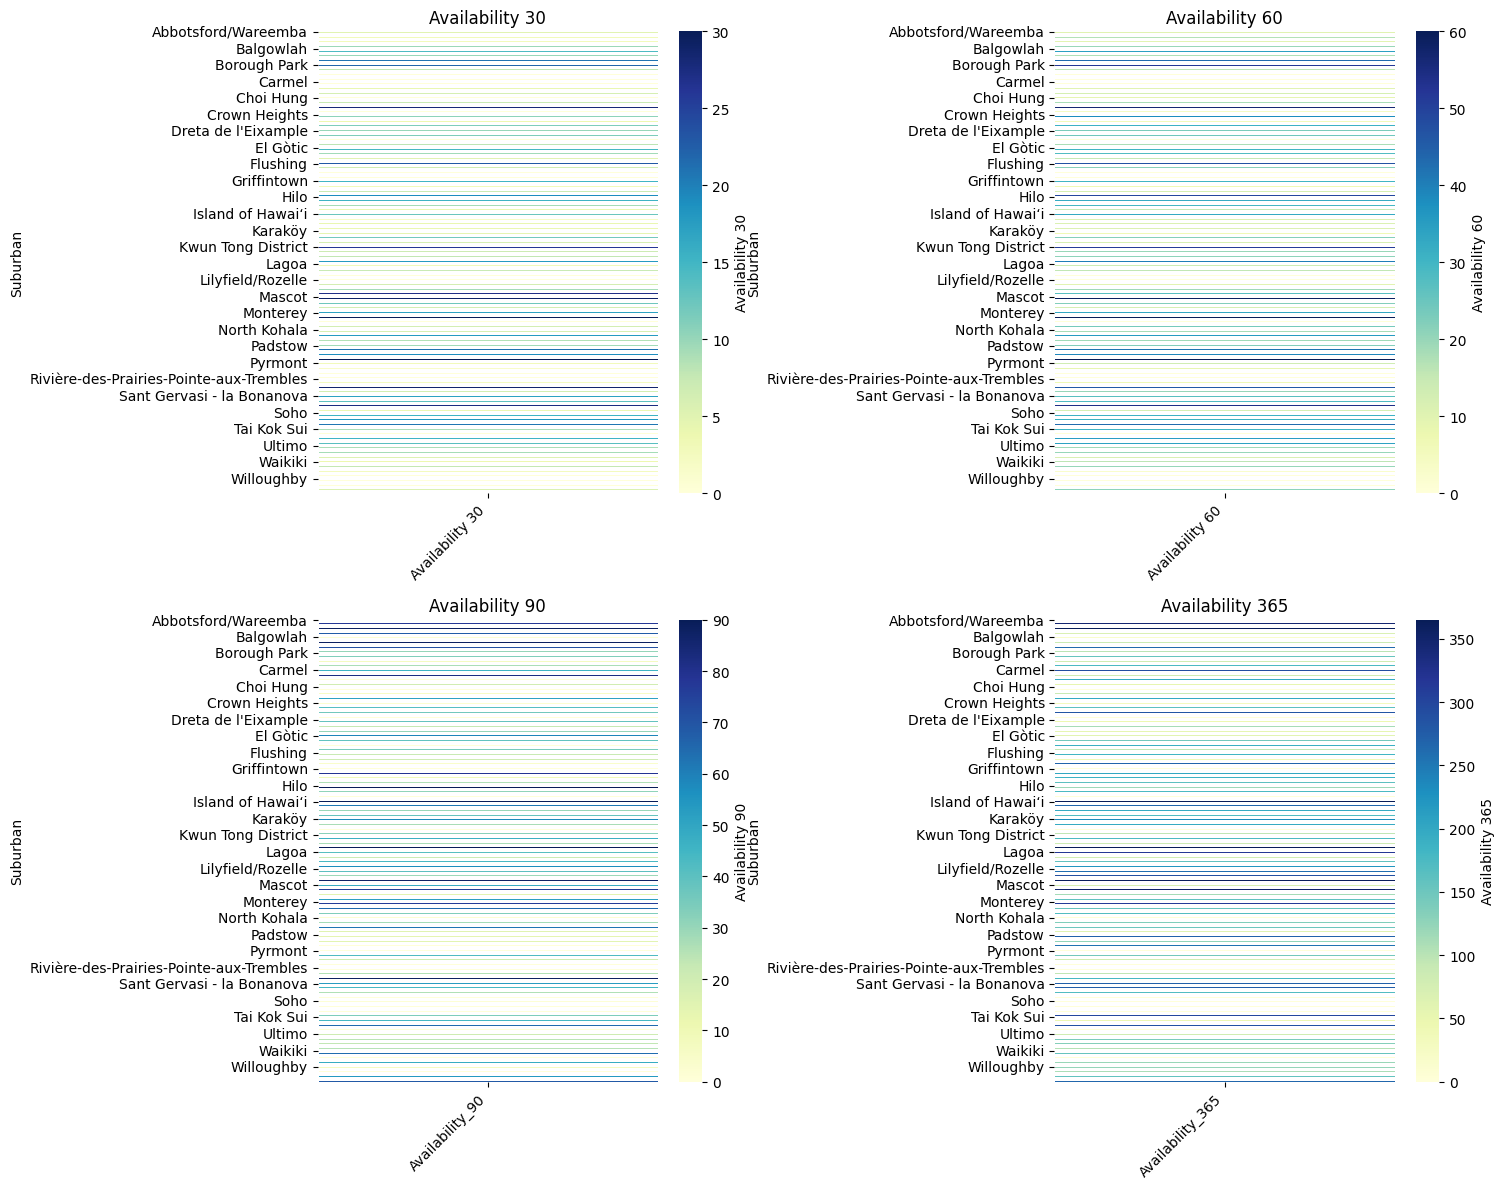

In [19]:
# Create separate heatmaps for each availability period
plt.figure(figsize=(15, 12))

# Availability 30 Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.pivot_table(index='Suburban', values='Availability 30', aggfunc='mean'),
            cmap="YlGnBu", cbar_kws={'label': 'Availability 30'}, linewidths=0.5)
plt.title('Availability 30')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Availability 60 Heatmap
plt.subplot(2, 2, 2)
sns.heatmap(df.pivot_table(index='Suburban', values='Availability 60', aggfunc='mean'),
            cmap="YlGnBu", cbar_kws={'label': 'Availability 60'}, linewidths=0.5)
plt.title('Availability 60')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Availability 90 Heatmap
plt.subplot(2, 2, 3)
sns.heatmap(df.pivot_table(index='Suburban', values='Availability_90', aggfunc='mean'),
            cmap="YlGnBu", cbar_kws={'label': 'Availability 90'}, linewidths=0.5)
plt.title('Availability 90')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Availability 365 Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(df.pivot_table(index='Suburban', values='Availability_365', aggfunc='mean'),
            cmap="YlGnBu", cbar_kws={'label': 'Availability 365'}, linewidths=0.5)
plt.title('Availability 365')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


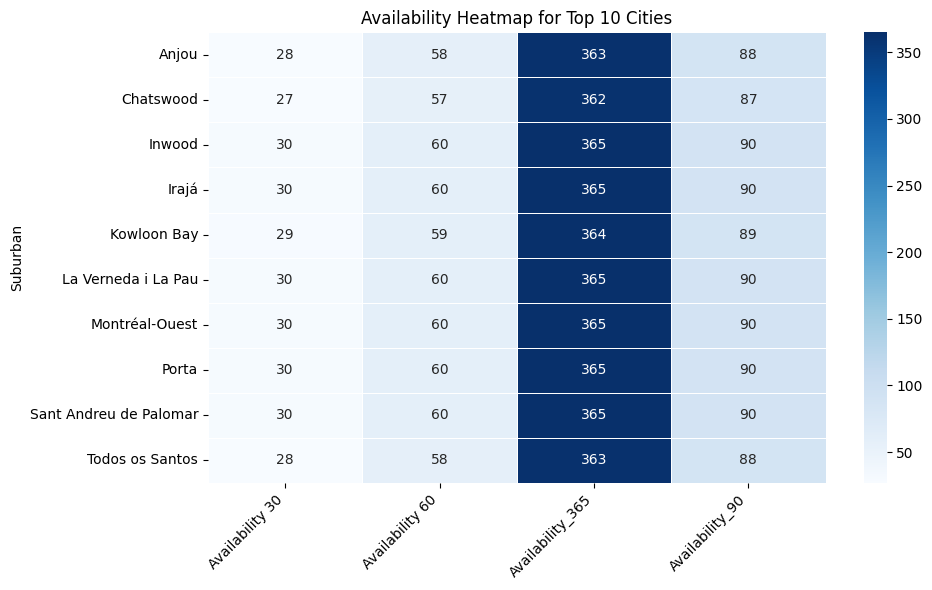

In [20]:
# Limit the heatmap to top 10 cities by Availability 365
top_cities = df.groupby('Suburban')['Availability_365'].mean().nlargest(10).index

# Filter the data for those cities
filtered_data = df[df['Suburban'].isin(top_cities)]

# Create a pivot table
availability_heatmap_data = filtered_data.pivot_table(index='Suburban', 
                                                     values=['Availability 30', 'Availability 60', 'Availability_90', 'Availability_365'],
                                                     aggfunc='mean')

# Plot the heatmap for the top 10 cities
plt.figure(figsize=(10, 6))
sns.heatmap(availability_heatmap_data, annot=True, cmap="Blues", linewidths=0.5, fmt=".0f")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title('Availability Heatmap for Top 10 Cities')
plt.tight_layout()
plt.show()
